<a href="https://colab.research.google.com/github/gavoumainville/domestic_violence.csv/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Frequency values:
12/31/2021    701
12/30/2021    244
Name: Report Date, dtype: int64
BRONX            343
BROOKLYN         304
QUEENS           148
MANHATTAN        112
STATEN ISLAND     38
Name: Borough Name, dtype: int64
34.0    31
38.0    30
35.0    30
31.0    28
33.0    27
        ..
93.0     1
12.0     1
7.0      1
9.0      1
83.0     1
Name: Victim Reported Age, Length: 83, dtype: int64
33.0    25
30.0    25
27.0    25
36.0    25
25.0    24
        ..
10.0     1
67.0     1
72.0     1
86.0     1
76.0     1
Name: Suspect Reported Age, Length: 64, dtype: int64
Mean, Median, and Mode for each numeric column:
[col]: Mean=64.89, Median=61.00, Mode=75
[col]: Mean=38.62, Median=36.00, Mode=34.0
[col]: Mean=35.74, Median=34.00, Mode=27.0
[col]: Mean=270.79, Median=301.00, Mode=305.0


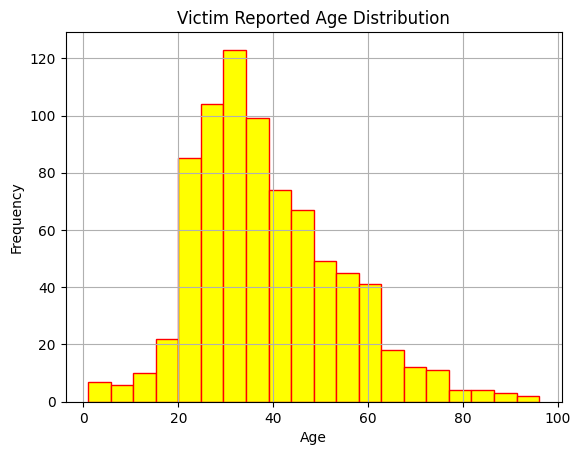

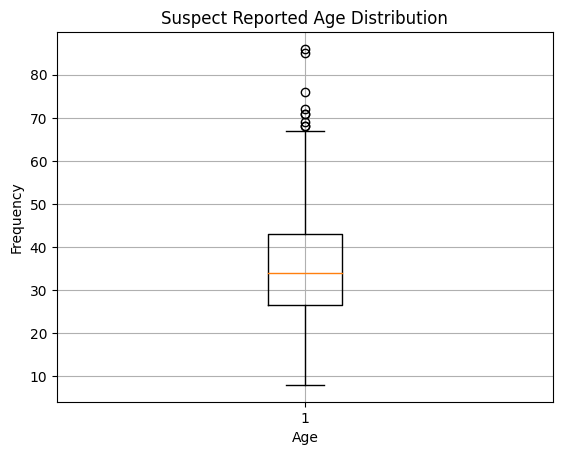

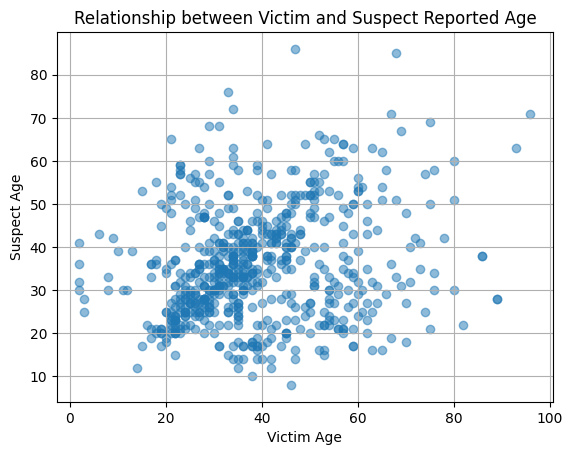

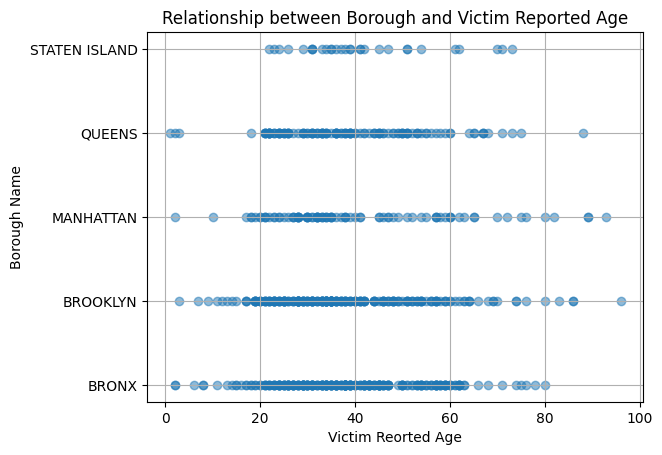

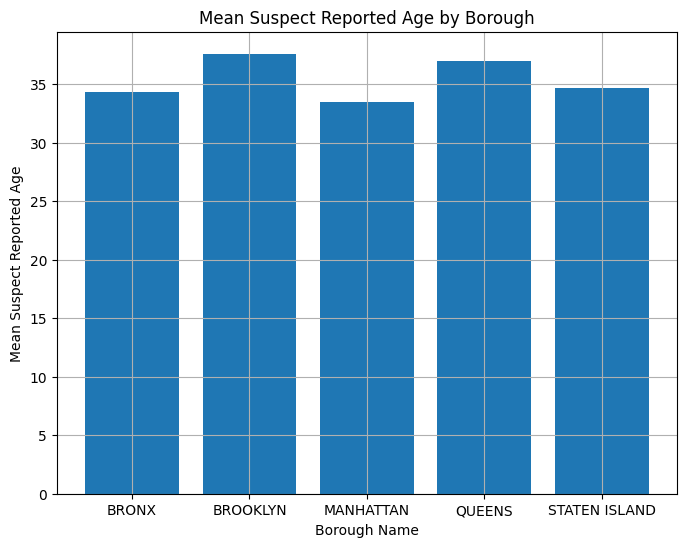


Missing data:
Offense Type                    0
Report Date                     0
Incident Precinct Code          0
Borough Name                    0
Intimate Relationship Flag      0
Victim Race                    89
Victim Sex                     65
Victim Reported Age           159
Suspect Race                  151
Suspect Sex                   129
Suspect Reported Age          274
COMMDIST                        1
ReportDate                      0
dtype: int64


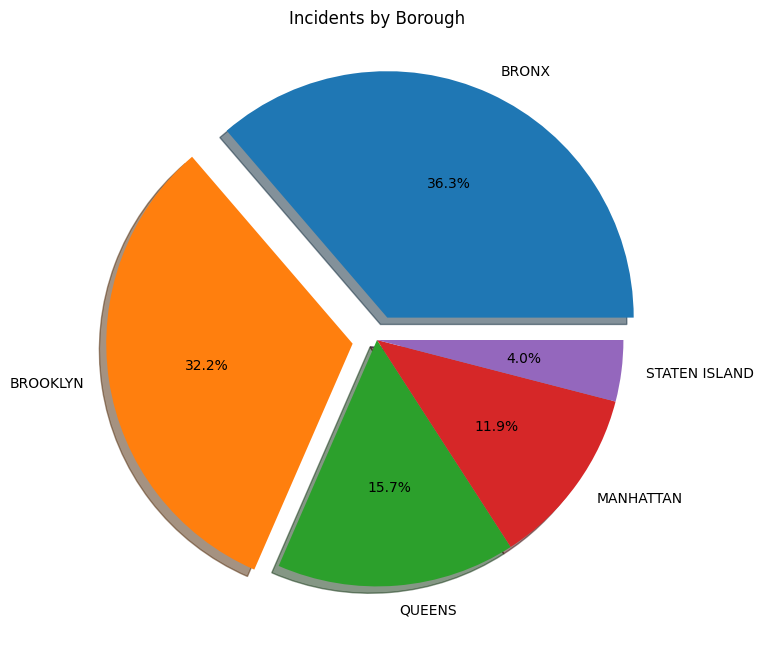

In [45]:

import pandas as pd
import matplotlib.pyplot as plt

# Load Data
df = pd.read_csv("https://raw.githubusercontent.com/gavoumainville/domestic_violence_NYC/main/ENDGBV_NYCfinal.csv")

#Preporcess Data
df.drop_duplicates(inplace = True)
df['ReportDate'] = pd.to_datetime(df['Report Date'])
df.drop(['Median Income', 'Poverty', 'Unemployment'], axis=1, inplace=True, errors='ignore')

# Display Frequency Values
print("Frequency values:")
print(df['Report Date'].value_counts())
print(df['Borough Name'].value_counts())
print(df['Victim Reported Age'].value_counts())
print(df['Suspect Reported Age'].value_counts())

# Calculate Stat
print("Mean, Median, and Mode for each numeric column:")
for col in df.columns:
  if df[col].dtype in ('float64', 'int64'):
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().values[0]
    print(f"[col]: Mean={mean:.2f}, Median={median:.2f}, Mode={mode}")

# Histogram, boxplot and frequency graphs
plt.hist(df['Victim Reported Age'].dropna(), bins=20, color='yellow', edgecolor='red')
plt.title('Victim Reported Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print()

plt.boxplot(df['Suspect Reported Age'].dropna())
plt.title('Suspect Reported Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

print()

plt.scatter(df['Victim Reported Age'], df['Suspect Reported Age'], alpha = 0.5)
plt.title('Relationship between Victim and Suspect Reported Age')
plt.xlabel('Victim Age')
plt.ylabel('Suspect Age')
plt.grid(True)
plt.show()

print()

plt.scatter(df['Victim Reported Age'], df['Borough Name'], alpha = 0.5)
plt.title('Relationship between Borough and Victim Reported Age')
plt.xlabel('Victim Reorted Age')
plt.ylabel('Borough Name')
plt.grid(True)
plt.show()

print()

mean_ages = df.groupby('Borough Name')['Suspect Reported Age'].mean()
plt.figure(figsize=(8,6))
plt.bar(mean_ages.index, mean_ages)
plt.title('Mean Suspect Reported Age by Borough')
plt.xlabel('Borough Name')
plt.ylabel('Mean Suspect Reported Age')
plt.grid(True)
plt.show()

print()

# Identify Missing Data
print("Missing data:")
print(df.isnull().sum())

#Pie Chart of Incidents by Borough
borough_counts = df['Borough Name'].value_counts()
explode = [0.1 if borough in borough_counts.nlargest(2).index else 0 for borough in borough_counts.index]
plt.figure(figsize=(10,8))
plt.pie(borough_counts, labels=borough_counts.index, autopct='%1.1f%%', explode=explode, shadow=True)
plt.title('Incidents by Borough')
plt.show()

